In [17]:
import math
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from okama.assets import Asset, AssetList, Portfolio
from okama.frontier import EfficientFrontier, EfficientFrontierReb, Plots
from okama.helpers import Frame
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Portfolio

In [2]:
ls = ['VNQ.US', 'SNGSP.MCX']
x = Portfolio(symbols=ls, curr='USD', first_date='2015-01', last_date='2020-01')

In [3]:
x.weights

[0.5, 0.5]

In [5]:
x.mean_return_monthly

0.012178819876164489

In [6]:
x.mean_return_annual

0.1563437144065083

In [7]:
x.risk_monthly

0.04356365834071058

In [8]:
x.risk_annual

0.17328436789926255

In [9]:
x.get_rebalanced_portfolio_return_ts().mean()

0.010292714584833771

In [12]:
x.get_rebalanced_portfolio_return_ts(period="N").mean()

0.010525105802228808

In [13]:
x.get_rebalanced_portfolio_return_ts().mean()

0.010292714584833771

#### Скорость и точность вычисления средней доходности

In [42]:
%%timeit
x.mean_return_monthly # через ковариацию

709 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%%timeit
x.returns_ts.mean() # через статистические данные (медленно?)

308 µs ± 20.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%%timeit
x.get_rebalanced_portfolio_return_ts().mean() # портфель с реблансировкой (еще медленне)

27.4 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
x.mean_return_monthly == x.returns_ts.mean()

True

In [34]:
x.mean_return_monthly

0.012178819876164489

In [35]:
x.returns_ts.mean()

0.012178819876164489

### Assets

In [7]:
a = Asset()

In [3]:
a.asset_currency

'USD'

In [4]:
a.market

'US'

In [5]:
a.ror

Date
1993-02    0.010668
1993-03    0.022386
1993-04   -0.025565
1993-05    0.026961
1993-06    0.003590
             ...   
2019-10    0.022105
2019-11    0.036198
2019-12    0.029055
2020-01   -0.000404
2020-02    0.036521
Freq: M, Name: SPY.US, Length: 325, dtype: float64

In [6]:
a.ticker

'SPY.US'

### Asset lists

In [22]:
ls = ['VNQ.US', 'SNGSP.MCX']
x = AssetList(symbols=ls, curr='USD')

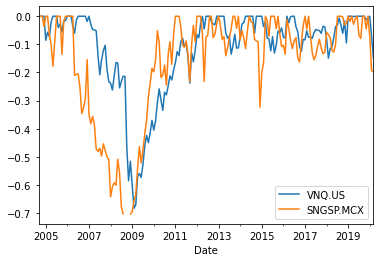

In [23]:
Frame.drawdowns(x.ror).plot()

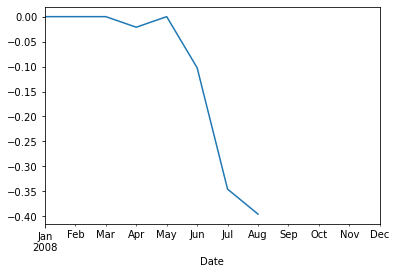

In [25]:
Frame.drawdowns(x.ror['SNGSP.MCX']['2008']).plot()

In [27]:
x.ror['SNGSP.MCX']['2008'].isna().any()

True

In [9]:
x = AssetList(first_date='1995-01', last_date='1999-12-02')

In [10]:
x.first_date

Timestamp('1995-01-01 00:00:00')

In [33]:
x.last_date

Timestamp('1999-12-01 00:00:00')

In [35]:
x.ror.head()

Date
1995-01    0.033617
1995-02    0.040821
1995-03    0.027844
1995-04    0.029622
1995-05    0.039668
Freq: M, Name: SPY.US, dtype: float64

In [34]:
x.ror.tail()

Date
1999-08   -0.005179
1999-09   -0.022336
1999-10    0.064078
1999-11    0.016649
1999-12    0.057107
Freq: M, Name: SPY.US, dtype: float64

In [10]:
x.last_date

Timestamp('2020-03-01 00:00:00')

In [8]:
y = AssetList(['SPY.US', '0890-94127385.RUFUND', '0165-70287767.RUFUND'], 'USD')

In [175]:
r = y.calculate_risk(annualize=True)

In [15]:
(x.ror['06-2018':'05-2019'] + 1).prod() - 1

0.03569126174978976

In [155]:
y.wealth_indexes

,SPY.US,0890-94127385.RUFUND,0165-70287767.RUFUND
Date,,,
2007-08,1016.596100,1007.26,995.022995
2007-09,1023.025596,1051.39,999.596800
2007-10,1029.305484,1136.39,1016.102816
2007-11,980.359095,1110.36,1013.192213
2007-12,974.611902,1134.79,1028.564229
...,...,...,...
2019-10,6722.097540,2306.70,3347.300447
2019-11,6987.385852,2308.96,3364.108864
2019-12,6918.413544,2410.98,3403.326403


In [8]:
x.currency

'USD'

In [9]:
x.tickers

['SPY.US']

In [23]:
y.ror.mean()

SPY.US                  0.014626
0890-94127385.RUFUND    0.008512
0165-70287767.RUFUND    0.008368
dtype: float64

In [12]:
x.ror

Date
1993-02    0.010668
1993-03    0.022386
1993-04   -0.025565
1993-05    0.026961
1993-06    0.003590
             ...   
2019-10    0.022105
2019-11    0.036198
2019-12    0.029055
2020-01   -0.000404
2020-02    0.036521
Freq: M, Name: SPY.US, Length: 325, dtype: float64

In [ ]:
x.calculate_wealth_index

In [ ]:
x.wealth_index

In [ ]:
x.calculate_wealth_index().plot(figsize=(12,6))

In [ ]:
y.calculate_wealth_index().plot(figsize=(12,6))

In [ ]:
y.calculate_wealth_index()['2010-01':]

In [ ]:
(2439.57/840.66)**(1/10) - 1

In [ ]:
y.wealth_index()

In [63]:
x = AssetList(symbols=['SPY.US', 'GAZP.MCX'], curr='RUB', first_date='2019-01', last_date='2020-01')

In [20]:
x.last_date

Timestamp('2020-01-01 00:00:00')

In [65]:
x.ror.to_frame

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [59]:
x.wealth_indexes.head()

Date
2019-01    1080.064874
2019-02    1115.076438
2019-03    1135.260223
2019-04    1181.638977
2019-05    1106.283898
Freq: M, Name: SPY.US, dtype: float64

In [34]:
x.risk

SPY.US      0.025860
GAZP.MCX    0.110256
dtype: float64

In [38]:
x.calculate_risk().sum()

0.13611625845630504

In [39]:
x.calculate_risk(annualize=True).sum()

0.723380689819134

In [60]:
x.wealth_indexes.sum(axis=1)[-1]

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [36]:
x.cagr.sum()

0.727483108320252